Final Project

In [3]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
#import folium
#import plotly.express as px
import seaborn as sns
# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split       


#import seaborn as sns

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2


In [4]:
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

In [5]:

import keras
from tensorflow.keras import Sequential
#from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow
print(keras.__version__)

Using TensorFlow backend.


2.3.1


In [25]:
csv_filename = 'TTS_data .csv'

dataf = pd.read_csv(csv_filename)

/home/rl755/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,3,13,28,29,30,31,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [67]:
dataf = dataf.where(dataf!= -1, dataf!=' ' ).dropna()

In [68]:
dataf

,Unnamed: 0,dataProvider1,dataProvider2,program1ProjectID,PTODate_orProxy_,systemSizeInDCSTC_KW_,totalInstalledCost___,Up_FrontCashIncentive___,customerSegment,is_expansion,...,inv_model1_clean,inverterQuantity_1,additionalInverterModels_Y_N_,inv_microinv1,inv_battery_hybrid1,inv_builtin_meter1,inv_outputcapacity1,dc_optimizer,ILR,TotalModuleQty
147456,147456,Connecticut Green Bank,-1,RPV-36439,29-Apr-19,9.45,39125.45,0.0,RES,0,...,SE7600H-US (240V),1.0,0.0,0.0,0.0,1.0,7.600,1.0,1.243421,60.194444
147457,147457,Connecticut Green Bank,-1,RPV-36440,22-May-19,7.04,31500.00,0.0,RES,0,...,SE5000H-US (240V),1.0,0.0,0.0,0.0,1.0,5.000,1.0,1.408000,44.196319
147458,147458,Connecticut Green Bank,-1,RPV-36441,31-Jan-19,12.95,48415.00,0.0,RES,0,...,SPR-X21-350-BLK-D-AC [240V],37.0,0.0,1.0,0.0,0.0,0.320,0.0,1.093750,74.214724
147459,147459,Connecticut Green Bank,-1,RPV-36442,14-Jan-19,15.12,60144.00,0.0,RES,0,...,SPR-X22-360-D-AC [208V],42.0,0.0,1.0,0.0,0.0,0.320,0.0,1.125000,79.220762
147461,147461,Connecticut Green Bank,-1,RPV-36444,21-Jun-19,9.60,40500.00,0.0,RES,0,...,SE7600A-US (240V),1.0,0.0,0.0,0.0,1.0,7.600,1.0,1.263158,60.196319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612664,612664,California Public Utilities Commission,-1,SCE-INT-NST-114132,5-Mar-20,9.62,17647.42,0.0,RES,0,...,SE10000H-US [240V],1.0,0.0,0.0,0.0,0.0,9.994,1.0,0.962578,51.192708
612665,612665,California Public Utilities Commission,California Energy Commission,SCE-INT-NST-115264,7-Mar-20,4.20,18900.00,1302.0,RES,0,...,SPR-X21-350-BLK-E-AC [240V],12.0,0.0,1.0,0.0,0.0,0.315,0.0,1.111111,23.214724
612666,612666,California Public Utilities Commission,-1,SCE-INT-NST-115622,5-Mar-20,4.20,21336.00,0.0,RES,0,...,SPR-X21-350-BLK-E-AC [240V],12.0,0.0,1.0,0.0,0.0,0.315,0.0,1.111111,23.214724
612667,612667,California Public Utilities Commission,-1,SCE-INT-NST-115980,5-Mar-20,4.20,17850.00,0.0,RES,0,...,SPR-X21-350-BLK-E-AC [240V],12.0,0.0,1.0,0.0,0.0,0.315,0.0,1.111111,23.214724


## Introductory Plots

<AxesSubplot:xlabel='mod_nameplate_capacity1', ylabel='mod_efficiency1'>

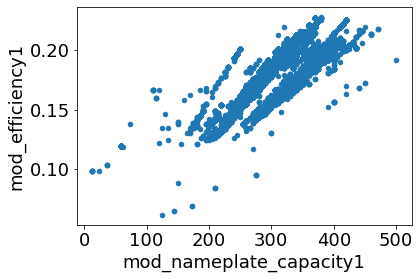

In [69]:
X = dataf['mod_nameplate_capacity1'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values
dataf.plot.scatter('mod_nameplate_capacity1','mod_efficiency1')

<AxesSubplot:xlabel='mod_nameplate_capacity1', ylabel='inv_outputcapacity1'>

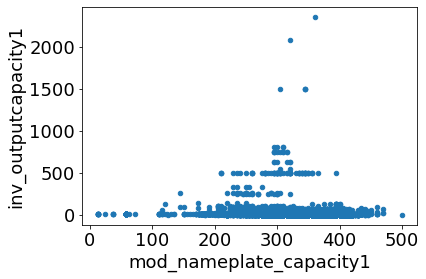

In [29]:
dataf.plot.scatter( 'mod_nameplate_capacity1', 'inv_outputcapacity1')

<AxesSubplot:xlabel='inv_battery_hybrid1', ylabel='mod_efficiency1'>

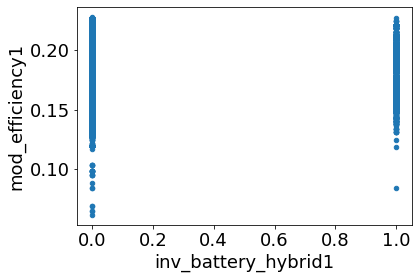

In [30]:
dataf.plot.scatter( 'inv_battery_hybrid1', 'mod_efficiency1')

<AxesSubplot:xlabel='systemSizeInDCSTC_KW_', ylabel='mod_efficiency1'>

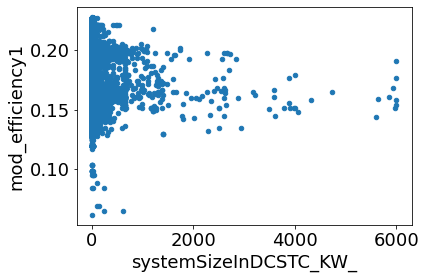

In [31]:
dataf.plot.scatter( 'systemSizeInDCSTC_KW_', 'mod_efficiency1')

<AxesSubplot:xlabel='moduleQty_1', ylabel='mod_efficiency1'>

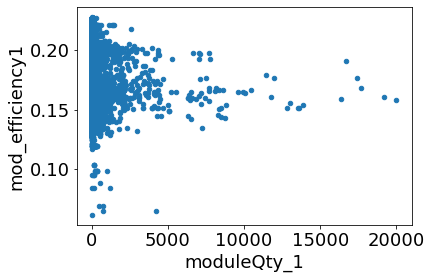

In [32]:

dataf.plot.scatter( 'moduleQty_1', 'mod_efficiency1')

<AxesSubplot:xlabel='inv_outputcapacity1', ylabel='mod_efficiency1'>

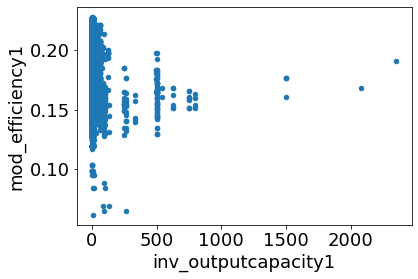

In [33]:
dataf.plot.scatter( 'inv_outputcapacity1', 'mod_efficiency1')

## Linear Regression Model for Efficiency and Nameplate Capacity

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98, shuffle=True)

In [35]:
print(X[:10000])

[[315.]
 [320.]
 [350.]
 ...
 [410.]
 [370.]
 [370.]]


In [36]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
Y_calc_test = regr.predict(X_test)

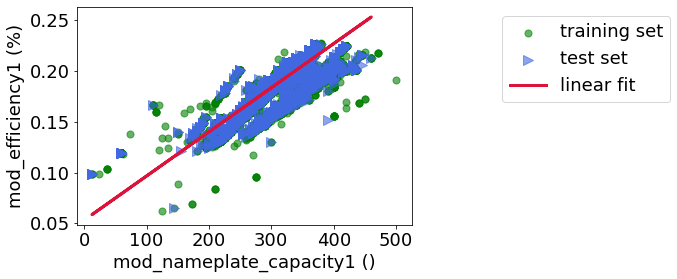

In [37]:
# Plotting our data with a scatter plot
plt.scatter(X_train, y_train, s=50, marker='o', color="green", alpha=0.6, label="training set")
plt.scatter(X_test, y_test, s=100, marker='>', color="royalblue", alpha=0.6, label="test set")
plt.xlabel('mod_nameplate_capacity1 ()')
plt.ylabel('mod_efficiency1 (%)')

# Plotting the linear regression ontop of the scatter plot 
plt.plot(X_test, Y_calc_test, color='crimson',linewidth=3, label='linear fit')
#plt.plot(X_test, Y_calc_test_2,':', color='black',linewidth=2, label='linear fit check')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
plt.show()

In [38]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, Y_calc_test))
# Print the coefficient of determination - 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, Y_calc_test))

Mean squared error: 0.00
Coefficient of determination: 0.78


In [39]:
# dataf.drop(dataf[dataf['inv_model1_clean'] == -1].index, inplace = True)

dataf['inv_model1_clean']

147456              SE7600H-US (240V)
147457              SE5000H-US (240V)
147458    SPR-X21-350-BLK-D-AC [240V]
147459        SPR-X22-360-D-AC [208V]
147461              SE7600A-US (240V)
                     ...             
612664             SE10000H-US [240V]
612665    SPR-X21-350-BLK-E-AC [240V]
612666    SPR-X21-350-BLK-E-AC [240V]
612667    SPR-X21-350-BLK-E-AC [240V]
612668              SE7600H-US [240V]
Name: inv_model1_clean, Length: 155480, dtype: object

In [40]:
bat = dataf['inv_battery_hybrid1'].values.reshape(-1, 1)


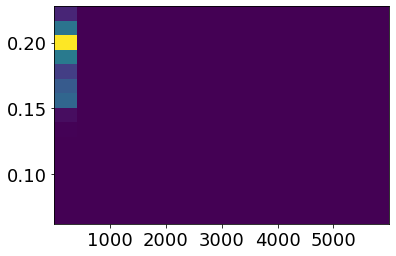

In [41]:
# plot:
fig, ax = plt.subplots()

ax.hist2d(dataf['systemSizeInDCSTC_KW_'],dataf['mod_efficiency1'], bins = 15)

#ax.set(xlim=(-2, 2), ylim=(-3, 3))

plt.show()

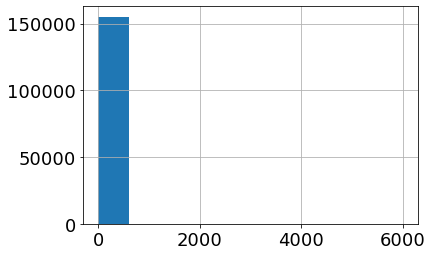

In [42]:
dataf['systemSizeInDCSTC_KW_'].hist()
plt.show()

In [43]:
# Declare regressor object & train it for nameplate capacitance and efficiency
dftree =  sklearn.tree.DecisionTreeRegressor().fit(X_train, y_train)
# Predict on .... set values

#reg = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = dftree.predict(X_test)
# Compute the r2 score and MSE
r2 = r2_score(y_test, y_pred)

#return r2, MSE, y_predict, X_train, X_test, y_train, y_test
print('r2 value:', r2)
# Evaluate MSE error
MSE = mean_squared_error(y_test, y_pred)
print('MSE Value : ', MSE)

r2 value: 0.8810791764390167
MSE Value :  4.1568365035241705e-05


## Neural Network

In [44]:
X = dataf[['mod_nameplate_capacity1']].values
Y = dataf[['mod_efficiency1']].values

In [45]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=98)

In [46]:
# Create the scaler from the training data only
X_train_scaler = StandardScaler().fit(X_train_pn)

# Apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train_pn)

In [47]:
def simple_network():
    model = Sequential()
    model.add(Dense(7, activation = 'relu', kernel_initializer = 'normal'))
    model.add(Dense(1, kernel_initializer= 'normal'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [48]:
# Create an instance of your simple_network() function
my_model = simple_network()
my_model.fit(X_train, y_train)
# Print it's summary()
my_model.summary()

2022-03-10 15:15:52.985097: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-10 15:15:52.989217: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-10 15:15:52.993972: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-10 15:15:53.139218: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-10 15:15:53.149571: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1796560000 Hz


3887/3887 [==============================] - 15s 4ms/step - loss: 0.0023
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (32, 7)                   14        
_________________________________________________________________
dense_1 (Dense)              (32, 1)                   8         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [49]:
np.random.seed(98)
estimator = KerasRegressor(build_fn=simple_network,
                          epochs = 30, batch_size= 1000, verbose =0)
history = estimator.fit(X_train, y_train, validation_split=0.33, epochs =30,
                       batch_size=1000, verbose =1)


Epoch 1/30
84/84 [==============================] - 3s 26ms/step - loss: 0.0260 - val_loss: 0.0023
Epoch 2/30
84/84 [==============================] - 1s 12ms/step - loss: 0.0011 - val_loss: 2.3664e-04
Epoch 3/30
84/84 [==============================] - 3s 31ms/step - loss: 1.7487e-04 - val_loss: 1.1270e-04
Epoch 4/30
84/84 [==============================] - 1s 11ms/step - loss: 1.0155e-04 - val_loss: 9.6125e-05
Epoch 5/30
84/84 [==============================] - 1s 13ms/step - loss: 8.9751e-05 - val_loss: 8.9482e-05
Epoch 6/30
84/84 [==============================] - 1s 11ms/step - loss: 8.5561e-05 - val_loss: 8.5432e-05
Epoch 7/30
84/84 [==============================] - 2s 18ms/step - loss: 8.0167e-05 - val_loss: 8.3159e-05
Epoch 8/30
84/84 [==============================] - 1s 12ms/step - loss: 7.9793e-05 - val_loss: 8.1703e-05
Epoch 9/30
84/84 [==============================] - 1s 7ms/step - loss: 7.9479e-05 - val_loss: 8.0733e-05
Epoch 10/30
84/84 [==============================]

In [50]:
print(history.history.keys())
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

dict_keys(['loss', 'val_loss'])
final MSE for train is 0.00 and for validation is 0.00


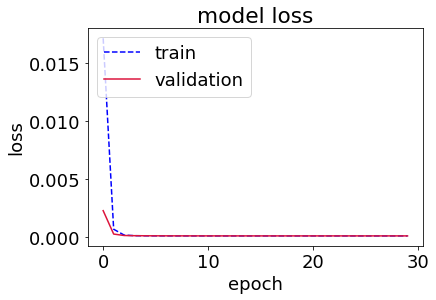

In [51]:
# Plot of model loss
plt.plot(history.history['loss'], '--', c='b')
plt.plot(history.history['val_loss'], c='crimson')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [52]:
# Test set error
test_loss = estimator.model.evaluate(X_test, y_test)
print("test set mse is %.2f" % test_loss)

972/972 [==============================] - 4s 4ms/step - loss: 27.2661
test set mse is 27.27


## Comparison of Efficiency based on Latitude and Longitude

<AxesSubplot:xlabel='mod_efficiency1', ylabel='latitude'>

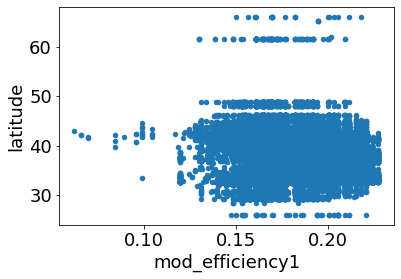

In [53]:
Xl = dataf['latitude'].values.reshape(-1, 1)
#Xl = np.delete(Xl,[' '])
yl = dataf['mod_efficiency1'].values
dataf.plot.scatter('mod_efficiency1', 'latitude')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(Xl, yl, test_size=0.2, random_state=98, shuffle=True)

In [55]:
# # Plotting our data with a scatter plot
# plt.scatter(X_train, y_train, s=50, marker='o', color="green", alpha=0.6, label="training set")
# plt.scatter(X_test, y_test, s=100, marker='>', color="royalblue", alpha=0.6, label="test set")
# plt.xlabel('mod_nameplate_capacity1 ()')
# plt.ylabel('mod_efficiency1 (%)')

# # Plotting the linear regression ontop of the scatter plot 
# plt.plot(X_test, Y_calc_test, color='crimson',linewidth=3, label='linear fit')
# #plt.plot(X_test, Y_calc_test_2,':', color='black',linewidth=2, label='linear fit check')
# plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
# plt.show()

<AxesSubplot:xlabel='longitude', ylabel='mod_efficiency1'>

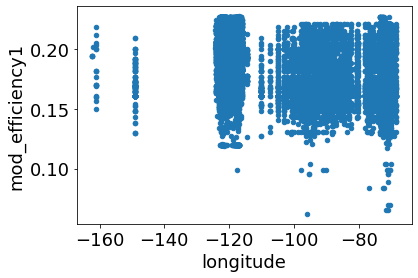

In [56]:
X = dataf['longitude'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values
dataf.plot.scatter('longitude','mod_efficiency1')

## Comparison of Efficiency and System Size

<AxesSubplot:xlabel='systemSizeInDCSTC_KW_', ylabel='mod_efficiency1'>

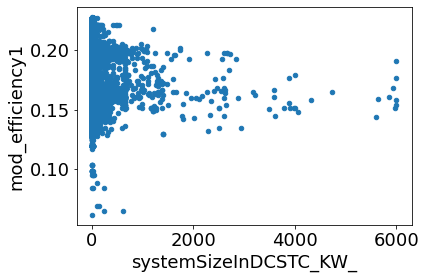

In [57]:
Xs = dataf['systemSizeInDCSTC_KW_'].values.reshape(-1, 1)
ys = dataf['mod_efficiency1'].values
dataf.plot.scatter('systemSizeInDCSTC_KW_','mod_efficiency1')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=98, shuffle=True)

In [59]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
Y_calc_test = regr.predict(X_test)

In [60]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
Y_calc_test = regr.predict(X_test)

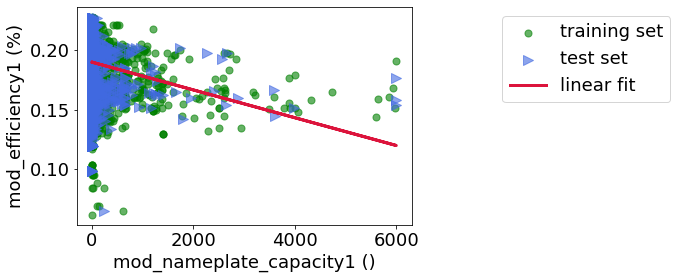

In [61]:
# Plotting our data with a scatter plot
plt.scatter(X_train, y_train, s=50, marker='o', color="green", alpha=0.6, label="training set")
plt.scatter(X_test, y_test, s=100, marker='>', color="royalblue", alpha=0.6, label="test set")
plt.xlabel('mod_nameplate_capacity1 ()')
plt.ylabel('mod_efficiency1 (%)')

# Plotting the linear regression ontop of the scatter plot 
plt.plot(X_test, Y_calc_test, color='crimson',linewidth=3, label='linear fit')
#plt.plot(X_test, Y_calc_test_2,':', color='black',linewidth=2, label='linear fit check')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
plt.show()

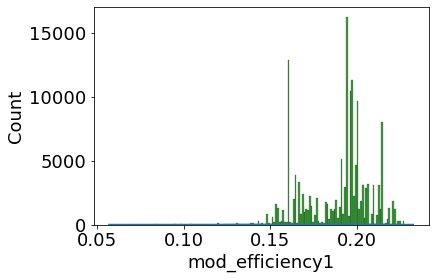

In [62]:
sns.histplot(data=dataf, x="mod_efficiency1", color='green')
sns.kdeplot(data=dataf, x="mod_efficiency1")
plt.show()

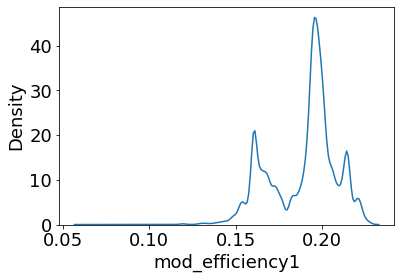

In [63]:
sns.kdeplot(data=dataf, x="mod_efficiency1")
plt.show()

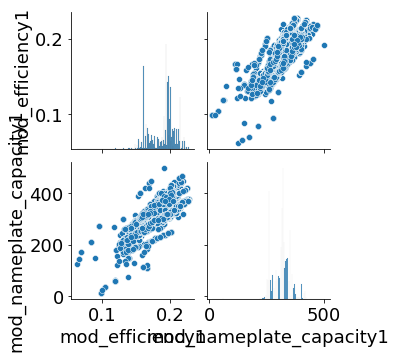

In [64]:
sns.pairplot(data=dataf[["mod_efficiency1", "mod_nameplate_capacity1"]])
fig.tight_layout()

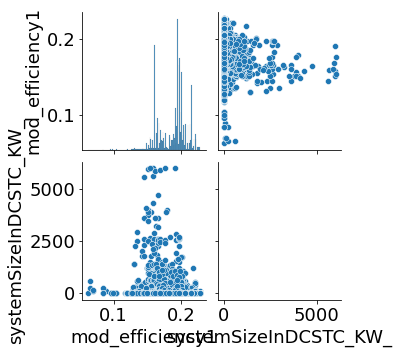

In [65]:
sns.pairplot(data = dataf[["mod_efficiency1", "systemSizeInDCSTC_KW_"]])